<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [71]:
dados = pd.read_csv('../../archive/HousePrices_HalfMil.csv')

## Visualizar os dados

In [72]:
dados

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,128,3,4,2,1,0,0,1,2,0,1,0,1,1,1,55900
499996,30,2,4,5,0,0,1,0,1,0,0,1,0,0,1,29250
499997,174,3,3,2,0,1,0,1,1,1,1,1,0,1,0,51350
499998,121,1,4,5,0,1,0,1,3,0,1,1,1,0,0,62725


## Verificando o tamanho do dataset

In [73]:
dados.shape[0]

500000

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [74]:
dados.describe().round(2)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.0,500000.00,500000.0,500000.0,500000.0,500000.0,500000.0,500000.0,500000.00
mean,124.93,2.00,2.00,3.00,0.33,0.33,0.33,0.5,2.00,0.5,0.5,0.5,0.5,0.5,0.5,42050.14
std,71.80,0.82,1.41,1.41,0.47,0.47,0.47,0.5,0.82,0.5,0.5,0.5,0.5,0.5,0.5,12110.24
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,7725.00
25%,63.00,1.00,1.00,2.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,33500.00
50%,125.00,2.00,2.00,3.00,0.00,0.00,0.00,0.0,2.00,0.0,1.0,1.0,0.0,1.0,1.0,41850.00
75%,187.00,3.00,3.00,4.00,1.00,1.00,1.00,1.0,3.00,1.0,1.0,1.0,1.0,1.0,1.0,50750.00
max,249.00,3.00,4.00,5.00,1.00,1.00,1.00,1.0,3.00,1.0,1.0,1.0,1.0,1.0,1.0,77975.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

-Entre as variáveis propostas são: Mármore Branco e Andares

-Positivo

-Sim

In [75]:
dados.corr().round(4)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.0000,-0.0009,0.0004,-0.0004,0.0025,-0.0015,-0.0010,-0.0008,-0.0035,0.0005,-0.0001,0.0001,-0.0012,0.0006,0.0014,0.1477
Garage,-0.0009,1.0000,0.0013,-0.0036,0.0005,0.0018,-0.0024,-0.0009,0.0008,0.0015,0.0008,-0.0006,-0.0022,0.0011,-0.0007,0.1003
FirePlace,0.0004,0.0013,1.0000,0.0006,0.0010,-0.0009,-0.0000,0.0002,-0.0002,-0.0003,0.0013,0.0018,-0.0004,0.0013,0.0002,0.0891
Baths,-0.0004,-0.0036,0.0006,1.0000,0.0025,-0.0027,0.0002,-0.0009,-0.0009,-0.0008,0.0010,-0.0007,-0.0017,0.0022,0.0017,0.1451
White Marble,0.0025,0.0005,0.0010,0.0025,1.0000,-0.4989,-0.5007,0.0001,-0.0009,-0.0016,0.0006,-0.0006,-0.0004,-0.0019,0.0010,0.4482
Black Marble,-0.0015,0.0018,-0.0009,-0.0027,-0.4989,1.0000,-0.5004,-0.0004,-0.0003,0.0018,-0.0005,0.0001,0.0001,0.0007,0.0001,-0.0780
Indian Marble,-0.0010,-0.0024,-0.0000,0.0002,-0.5007,-0.5004,1.0000,0.0003,0.0012,-0.0002,-0.0000,0.0005,0.0003,0.0012,-0.0011,-0.3698
Floors,-0.0008,-0.0009,0.0002,-0.0009,0.0001,-0.0004,0.0003,1.0000,-0.0006,-0.0027,0.0001,0.0014,-0.0000,-0.0002,-0.0005,0.6195
City,-0.0035,0.0008,-0.0002,-0.0009,-0.0009,-0.0003,0.0012,-0.0006,1.0000,0.0005,0.0008,-0.0027,0.0008,0.0003,0.0012,0.2333
Solar,0.0005,0.0015,-0.0003,-0.0008,-0.0016,0.0018,-0.0002,-0.0027,0.0005,1.0000,0.0019,0.0002,-0.0008,-0.0005,-0.0043,0.0084


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [76]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [77]:
sns.set_palette("Accent")

sns.set_style('darkgrid')

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Preço dos Imóveis'}, ylabel='Reais'>

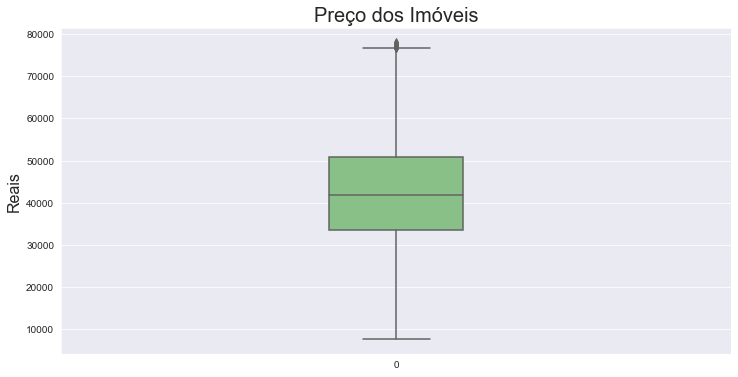

In [78]:
ax = sns.boxplot(data=dados['Prices'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Reais', fontsize=16)
ax

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

<AxesSubplot:title={'center':'Preço dos imóveis'}, xlabel='Garagem', ylabel='Reais'>

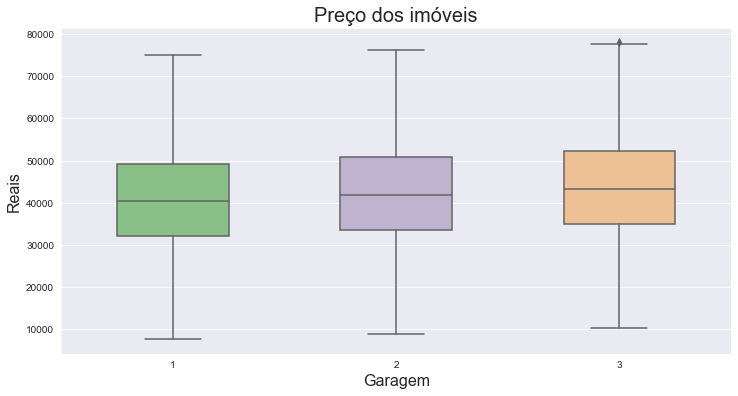

In [79]:
ax = sns.boxplot(y='Prices', x='Garage', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos imóveis', fontsize=20)
ax.set_ylabel('Reais', fontsize=16)
ax.set_xlabel('Garagem', fontsize=16)
ax

### Box-plot (Preço X Banheiros)

<AxesSubplot:title={'center':'Preço dos imóveis'}, xlabel='Banheiros', ylabel='Reais'>

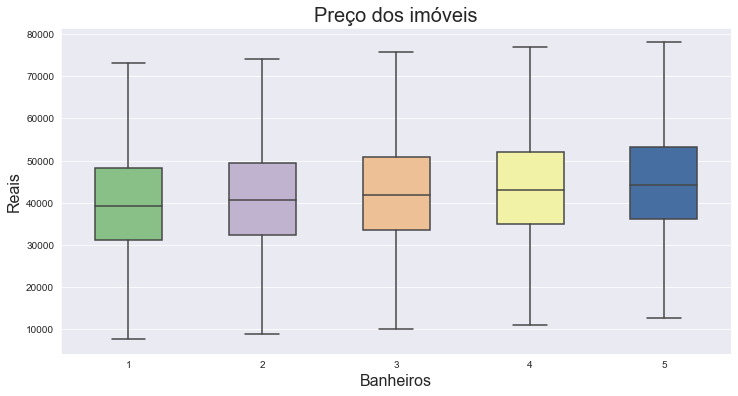

In [80]:
ax = sns.boxplot(y='Prices', x='Baths', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos imóveis', fontsize=20)
ax.set_ylabel('Reais', fontsize=16)
ax.set_xlabel('Banheiros', fontsize=16)
ax

### Box-plot (Preço X Lareira)

<AxesSubplot:title={'center':'Preço dos imóveis'}, xlabel='Lareira', ylabel='Reais'>

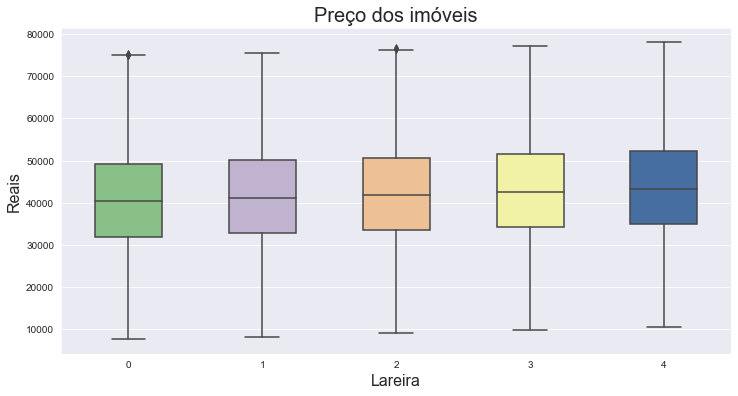

In [81]:
ax = sns.boxplot(y='Prices', x='FirePlace', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos imóveis', fontsize=20)
ax.set_ylabel('Reais', fontsize=16)
ax.set_xlabel('Lareira', fontsize=16)
ax

### Box-plot (Preço X Acabamento em Mármore)

<AxesSubplot:title={'center':'Preço dos imóveis'}, xlabel='Mármore Branco', ylabel='Reais'>

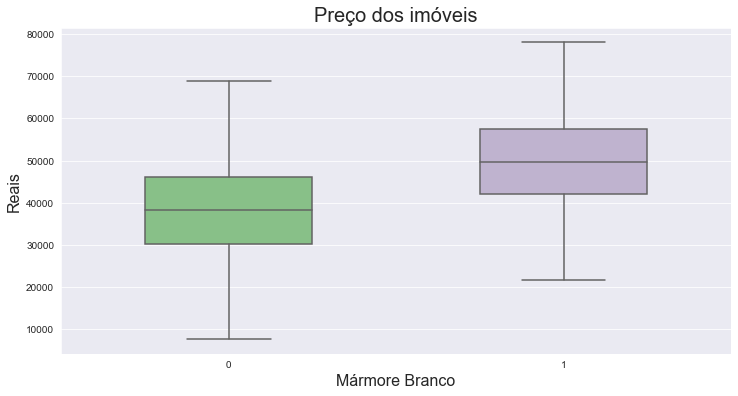

In [82]:
ax = sns.boxplot(y='Prices', x='White Marble', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos imóveis', fontsize=20)
ax.set_ylabel('Reais', fontsize=16)
ax.set_xlabel('Mármore Branco', fontsize=16)
ax

### Box-plot (Preço X Andares)

<AxesSubplot:title={'center':'Preço dos imóveis'}, xlabel='Andares', ylabel='Reais'>

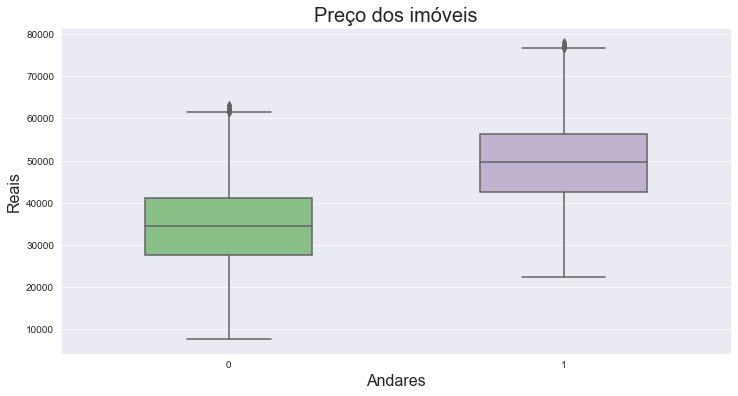

In [83]:
ax = sns.boxplot(y='Prices', x='Floors', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos imóveis', fontsize=20)
ax.set_ylabel('Reais', fontsize=16)
ax.set_xlabel('Andares', fontsize=16)
ax

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot:title={'center':'Distribuição de Frequência'}, xlabel='Prices', ylabel='Preço dos Imóveis em Reais'>

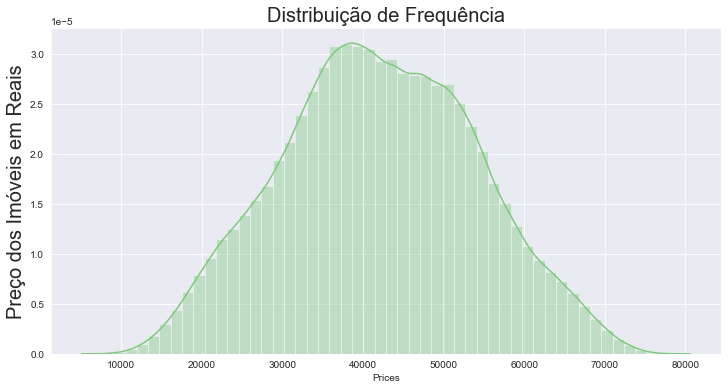

In [84]:
ax = sns.distplot(dados['Prices'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_ylabel('Preço dos Imóveis em Reais', fontsize=20)
ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

Text(0.5, 1.1, 'Dispersão entre as variáveis')

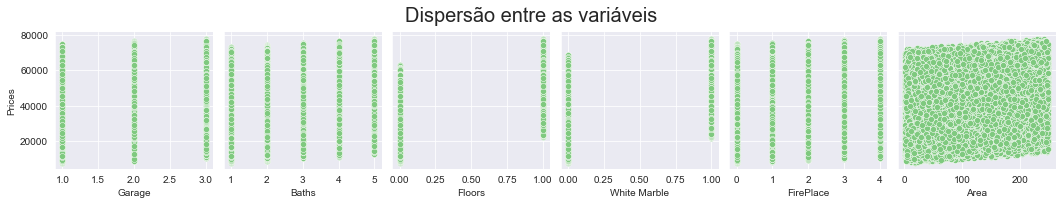

In [85]:
ax = sns.pairplot(dados, y_vars='Prices', x_vars=['Garage', 'Baths', 'Floors', 'White Marble', 'FirePlace', 'Area'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)

Text(0.5, 1.1, 'Dispersão entre as variáveis')

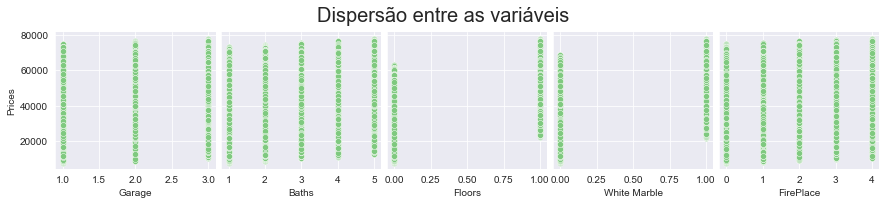

In [86]:
ax = sns.pairplot(dados, y_vars='Prices', x_vars=['Garage', 'Baths', 'Floors', 'White Marble', 'FirePlace'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [87]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [88]:
y = dados['Prices']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [89]:
X = dados[['Garage', 'Baths', 'Floors', 'White Marble', 'FirePlace', 'Area']]

## Criando os datasets de treino e de teste

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [92]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [93]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [94]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.65


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [95]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [96]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.64


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [97]:
['Garage', 'Baths', 'Floors', 'White Marble', 'FirePlace', 'Area']

garagem = 2
banheiro = 2
andares = 0
marmore = 0
lareira = 0
area = 125

entrada=[[garagem, banheiro, andares, marmore, lareira, area]]

print(f'{modelo.predict(entrada)[0].round(2)} Reais')

27982.79 Reais


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo com Temperatura Máxima

In [98]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R2'], columns=['Métricas'])

,Métricas
EQM,52091445.53
REQM,7217.44
R2,0.64


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [99]:
import pickle

## Salvando o modelo estimado

In [100]:
output = open('modelo_preço_imóvel', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```